In [1]:
# Import libraries
import os
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

matplotlib.rcParams['figure.figsize'] = (9.0, 9.0)

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/48hboi1m4crv1tl/opencv_bootcamp_assets_NB3.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB3.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

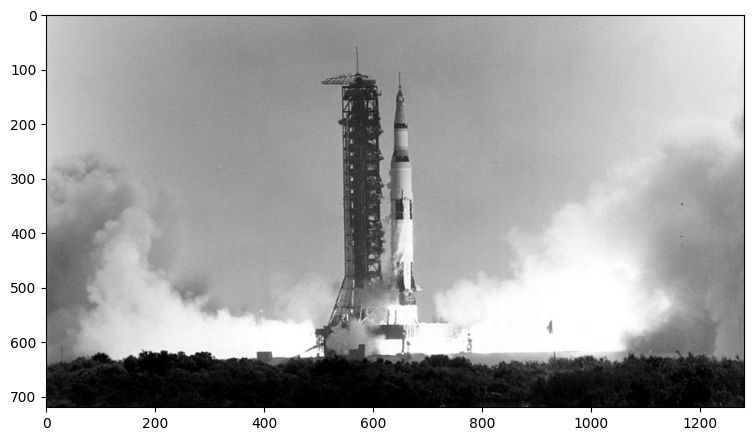

In [18]:
# Read in an image
image = cv2.imread("Apollo_11_Launch.jpg", cv2.IMREAD_COLOR)

# Display the original image
plt.imshow(image[:, :, ::-1])

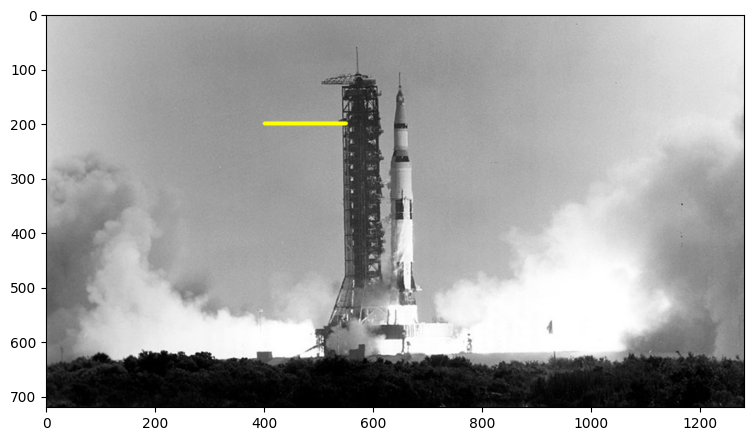

In [19]:
imageLine = image.copy()
img_line = cv2.line(imageLine, (400,200), (550, 200), (0,255,255), thickness=5, lineType=cv2.LINE_AA)
plt.imshow(img_line[:,:,::-1])

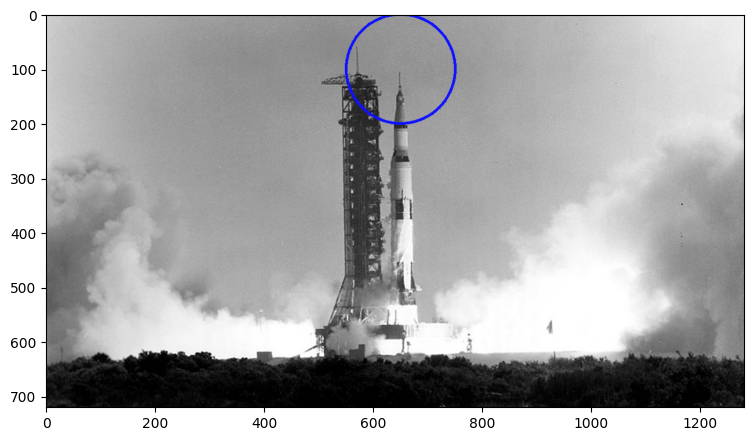

In [71]:
img_circle = image.copy()
cv2.circle(img_circle, (650,100), 100, (255,18,15), thickness = 3)
plt.imshow(img_circle[:,:,::-1])

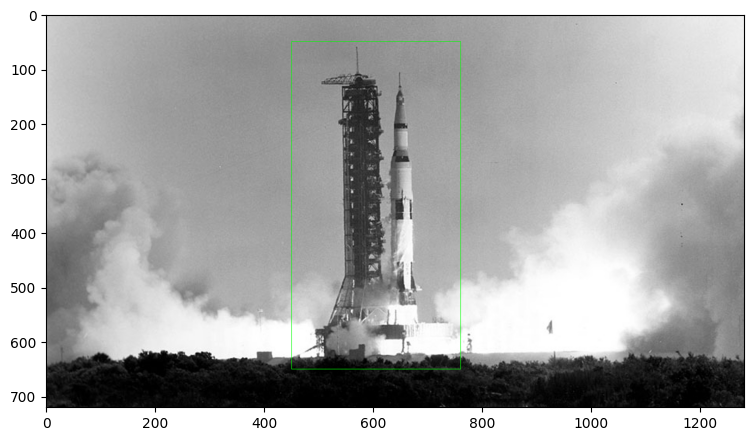

In [36]:
img_rect = image.copy()
cv2.rectangle(img_rect, (450,50),(760,650), (0,255,0))
plt.imshow(img_rect[:,:,::-1])

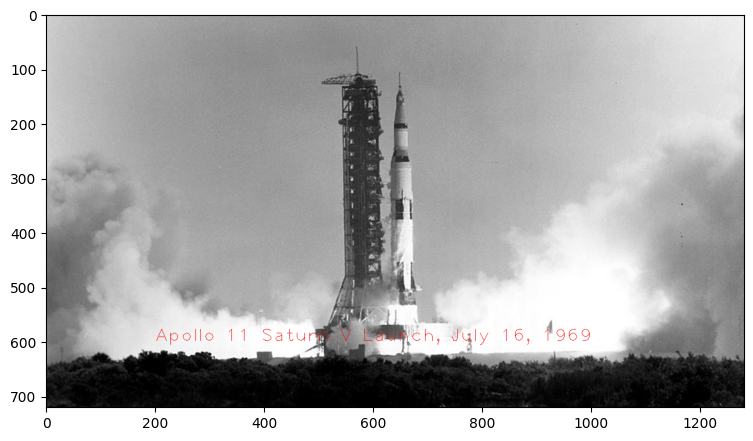

In [72]:
img_text = image.copy()
cv2.putText(img_text, "Apollo 11 Saturn V Launch, July 16, 1969",(200,600),fontScale=2.3, fontFace=cv2.FONT_HERSHEY_PLAIN, color=(0,0,255))
plt.imshow(img_text[:,:,::-1])

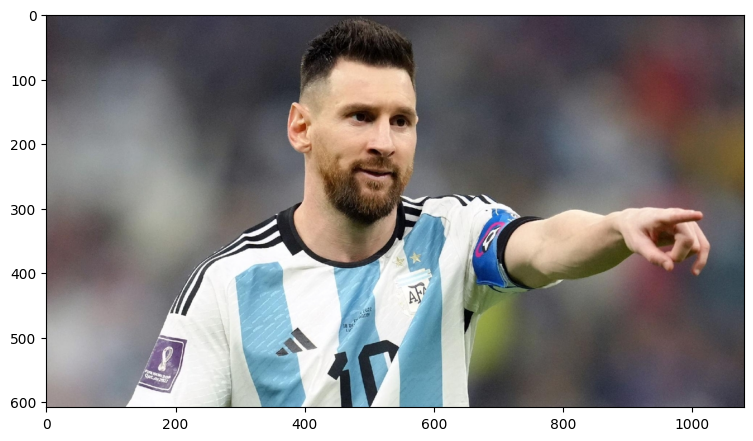

In [79]:
image = cv2.imread('images/messi.jpg')
plt.imshow(image[:,:,::-1])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Original')

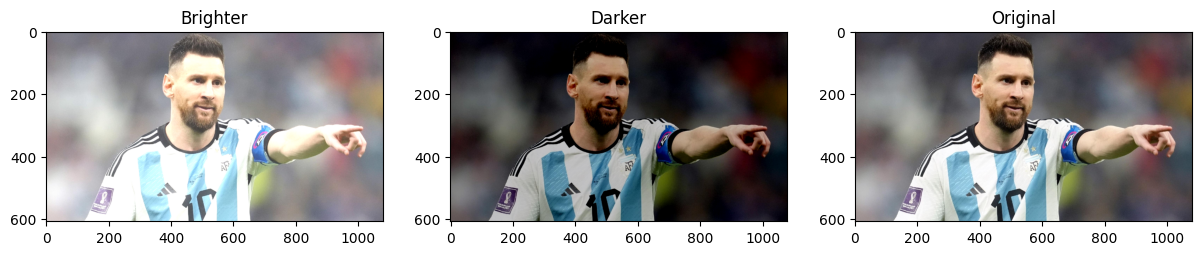

In [87]:
matrix = np.ones(image.shape,dtype='uint8')*60

img_brighter = cv2.add(image, matrix)
img_darker = cv2.subtract(image, matrix)

plt.figure(figsize=[20,6])
plt.subplot(141);plt.imshow(img_brighter); plt.title('Brighter')
plt.subplot(142);plt.imshow(img_darker); plt.title('Darker')
plt.subplot(143);plt.imshow(image); plt.title('Original')

Text(0.5, 1.0, 'Original')

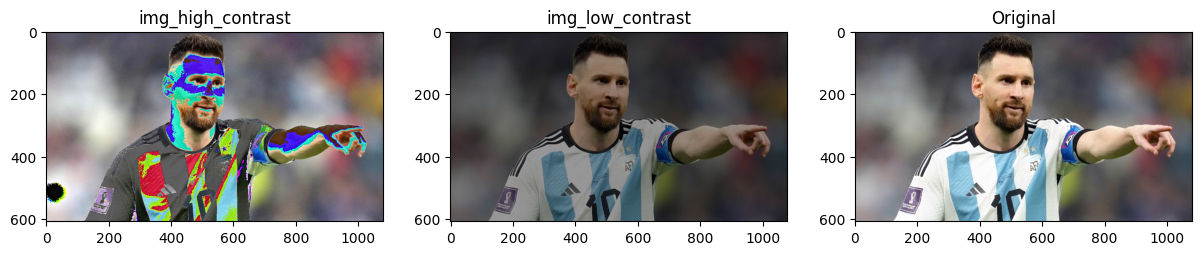

In [92]:
matrix_low_contrast = np.ones(image.shape, dtype='uint8')*0.6
matrix_high_contrast = np.ones(image.shape, dtype='uint8')*1.4

img_high_contrast = np.uint8(cv2.multiply(np.float64(image),matrix_high_contrast))
img_low_contrast = np.uint8(cv2.multiply(np.float64(image),matrix_low_contrast))

plt.figure(figsize=[20,6])
plt.subplot(141);plt.imshow(img_high_contrast); plt.title('img_high_contrast')
plt.subplot(142);plt.imshow(img_low_contrast); plt.title('img_low_contrast')
plt.subplot(143);plt.imshow(image); plt.title('Original')


Text(0.5, 1.0, 'Original')

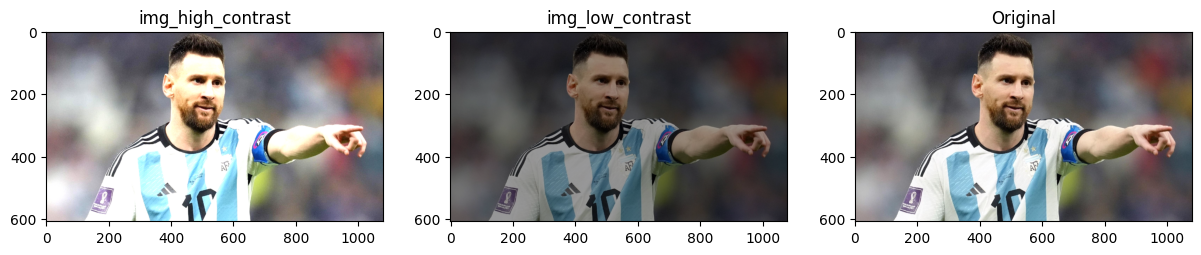

In [98]:
#to handle overlapping issue
matrix_low_contrast = np.ones(image.shape, dtype='uint8')*0.6
matrix_high_contrast = np.ones(image.shape, dtype='uint8')*1.4

img_high_contrast = np.uint8(np.clip(cv2.multiply(np.float64(image),matrix_high_contrast),0,255))
img_low_contrast = np.uint8(cv2.multiply(np.float64(image),matrix_low_contrast))

plt.figure(figsize=[20,6])
plt.subplot(141);plt.imshow(img_high_contrast); plt.title('img_high_contrast')
plt.subplot(142);plt.imshow(img_low_contrast); plt.title('img_low_contrast')
plt.subplot(143);plt.imshow(image); plt.title('Original')

(608, 1080)


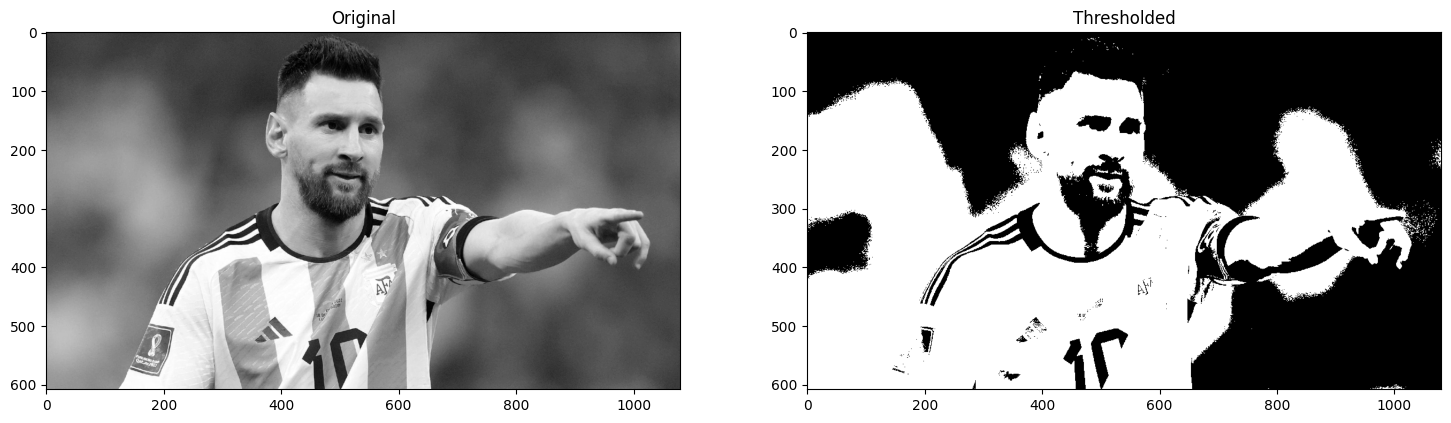

In [107]:
img_read = cv2.imread("images/messi.jpg", cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)

# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(121);plt.imshow(img_read, cmap="gray");  plt.title("Original")
plt.subplot(122);plt.imshow(img_thresh, cmap="gray");plt.title("Thresholded")

print(img_thresh.shape)

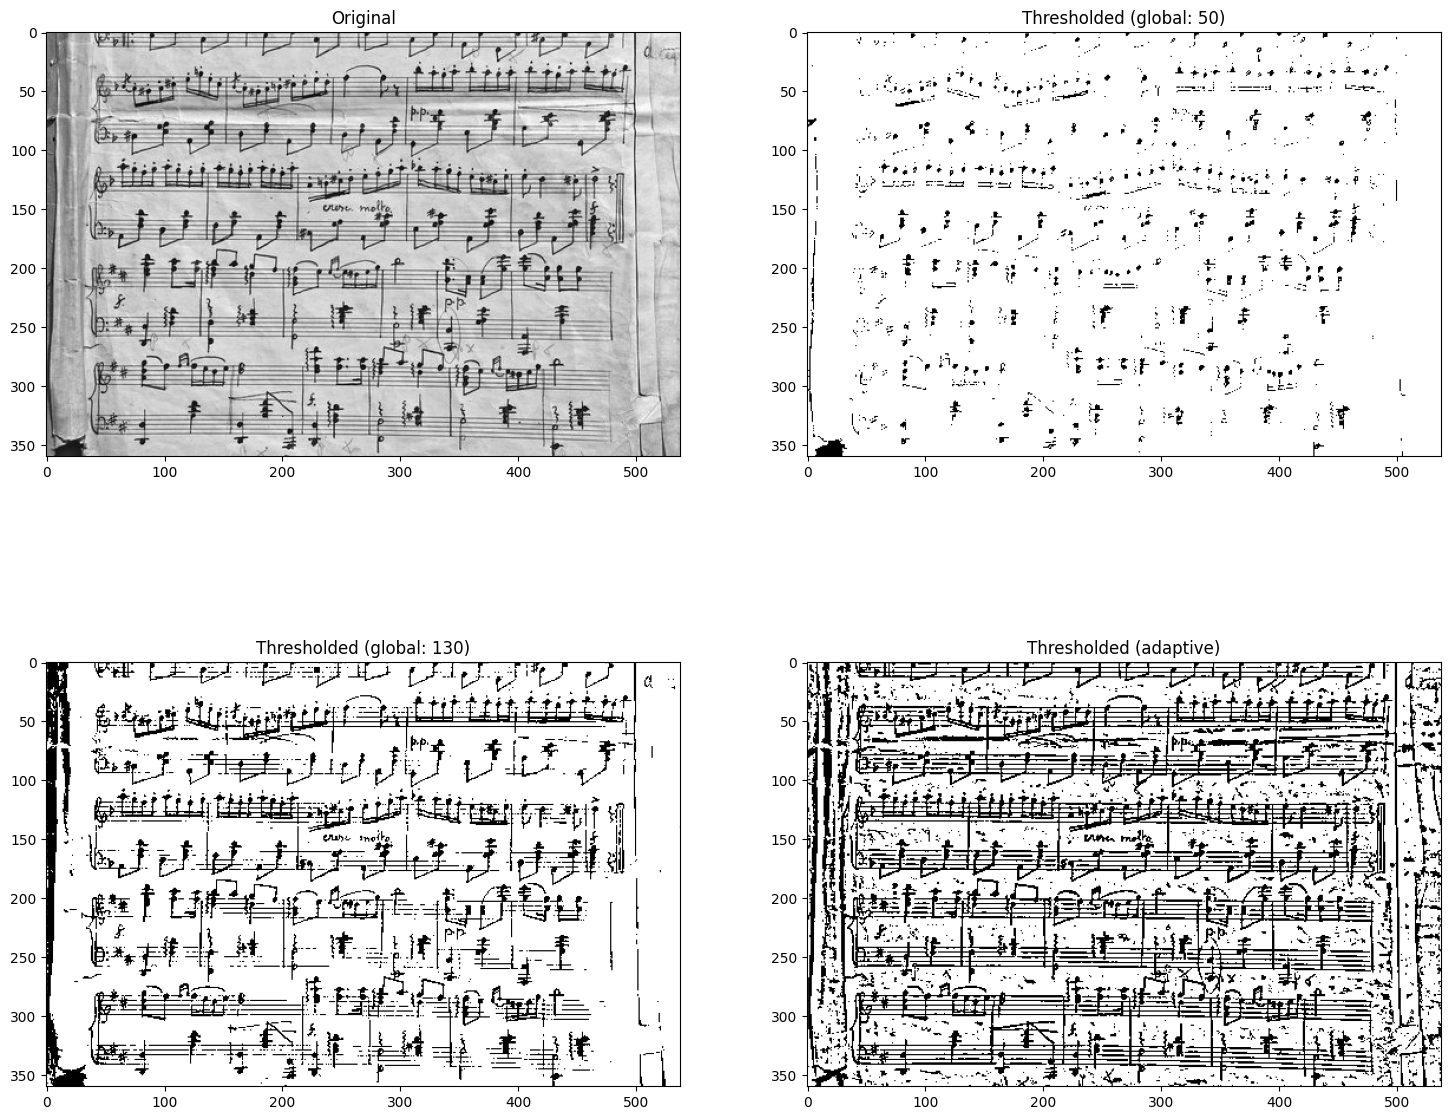

In [111]:
# Read the original image
img_read = cv2.imread("images/music.jpg", cv2.IMREAD_GRAYSCALE)

# Perform global thresholding
retval, img_thresh_gbl_1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)

# Perform global thresholding
retval, img_thresh_gbl_2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

# Perform adaptive thresholding
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)");